<a href="https://colab.research.google.com/github/HarrisonCaetanoCandido/Simulac-ao-e-An-alise-de-Modelos-de-Difus-ao-de-Contaminantes-em-Agua/blob/main/Relatorio3PCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto PCD: Simulação e Análise de Modelos de Difusão de Contaminantes em Água

## Profs. Álvaro e Denise (Turmas I e N)

**Objetivo**: Criar uma simulação que modele a difusão de contaminantes em um corpo d'água (como um lago ou rio), aplicando conceitos de paralelismo para acelerar o cálculo e observar o comportamento de poluentes ao longo do tempo. O projeto investigará o impacto de OpenMP, CUDA e MPI no tempo de execução e na precisão do modelo.

## Etapas do Projeto

### 1. Estudo do Modelo de Difusão
   - Estudar a Equação de Difusão/Transporte transiente, representada por:
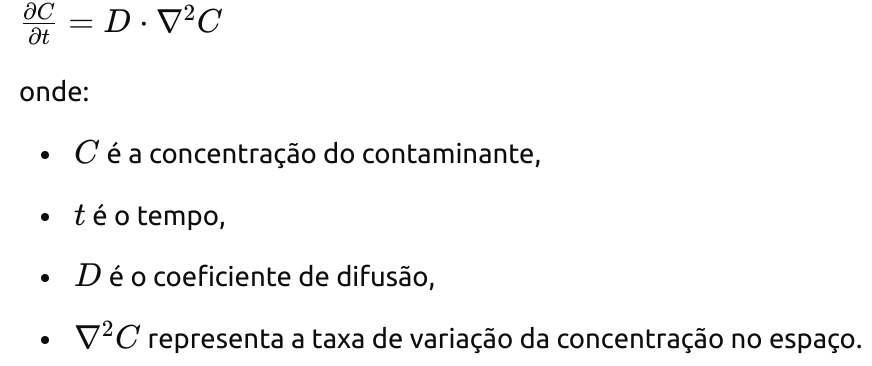

   - A equação diferencial pode ser aproximada (discretizada) no tempo e no espaço usando diferenças finitas em uma grade bidimensional, onde a discretização no espaço implica que cada célula da grade atualiza seu valor com base nas células vizinhas em cada iteração. O cálculo da grade atualizada deverá se repetir para que sejam feitas várias interações discretas no tempo.

### 2. Configuração do Ambiente e Parâmetros da Simulação
   - Configurar uma grade 2D onde cada célula representa a concentração de contaminantes em uma região do corpo d'água.
   - Definir o coeficiente de difusão \(D\), as condições de contorno (por exemplo, bordas onde o contaminante não se espalha) e as condições iniciais (como uma área de alta concentração de contaminante).
   - Definir uma quantidade fixa de interações no tempo como 1000 iterações.

### 3. Implementação com OpenMP (Simulação Local em CPU)
   - Usar OpenMP para paralelizar o cálculo de difusão entre os núcleos da CPU. Cada núcleo processa uma parte da grade, aplicando as regras de difusão às células sob sua responsabilidade.
   -**Entrega 1**: demonstrar o código em OpenMP e apresentar avaliação de desempenho com relação à versão sequencial.

### 4. Implementação com CUDA (Simulação em GPU)
   - Implementar a simulação em CUDA, onde cada célula da grade é processada por uma thread independente na GPU, utilizando um esquema de diferenças finitas para calcular o laplaciano de \(C\).
   - A execução em GPU permite simular uma grade maior e observar o ganho de desempenho com CUDA.
   -**Entrega 2**: demonstrar o código em CUDA e apresentar avaliação de desempenho com relação às versões anteriores.

### 5. Distribuição com MPI (Simulação em Larga Escala)
   - Dividir a grade em sub-regiões e distribuir o processamento entre várias máquinas usando MPI.
   - Cada máquina processa uma seção do corpo d'água e troca informações nas bordas com as máquinas vizinhas para garantir a continuidade da difusão de contaminantes entre as regiões.
   -**Entrega 3**: demonstrar o código em MPI hibrido (pode incluir trechos em OpenMP e CUDA) e apresentar avaliação de desempenho com relação às versões anteriores, porém destacando a escalabilidade possível apenas com MPI.

### 6. Artigo científico e Discussão dos Resultados
   - Criar gráficos que mostrem a evolução da concentração ao longo do tempo e comparar o tempo de execução entre as implementações.
   - Discutir as vantagens e limitações de cada abordagem, observando a escalabilidade, precisão e aplicabilidade em simulações ambientais.
   - Demonstrar visualmente os resultados que comprovem a corretude da simulação.
   -**Entrega Final**: entregar o resultado final no formato de artigo científico (modelo a ser disponibilizado).


## Ponto de Partida para a Implementação da Equação

Para aproximar a Equação de Difusão, podemos usar a seguinte fórmula de diferenças finitas central:
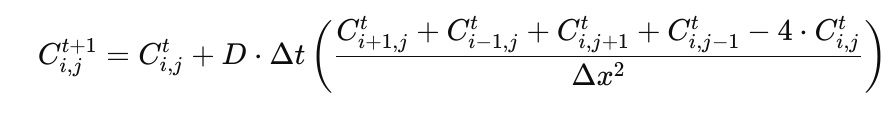

Abaixo está um trecho de código em C para uma implementação sequencial simples, o qual calcula a difusão do contaminante em uma grade de 2000x2000 ao longo de 500 ciclos. A concentração inicial está configurada no centro da grade, e o coeficiente de difusão \(D\) pode ser ajustado conforme necessário.


In [ ]:
!apt-get update
!apt-get install -y mpich


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,523 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,910 kB]
Fetched 4,689 kB in 3s (1,815 kB/s)
Reading package lists... Done
W: Skipping acquire of configur

In [ ]:
!apt-get install -y cuda


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cpp-12 cuda-12-8 cuda-cccl-12-8 cuda-command-line-tools-12-8 cuda-compiler-12-8 cuda-crt-12-8
  cuda-cudart-12-8 cuda-cudart-dev-12-8 cuda-cuobjdump-12-8 cuda-cupti-12-8 cuda-cupti-dev-12-8
  cuda-cuxxfilt-12-8 cuda-demo-suite-12-8 cuda-documentation-12-8 cuda-driver-dev-12-8
  cuda-gdb-12-8 cuda-libraries-12-8 cuda-libraries-dev-12-8 cuda-nsight-12-8
  cuda-nsight-compute-12-8 cuda-nsight-systems-12-8 cuda-nvcc-12-8 cuda-nvdisasm-12-8
  cuda-nvml-dev-12-8 cuda-nvprof-12-8 cuda-nvprune-12-8 cuda-nvrtc-12-8 cuda-nvrtc-dev-12-8
  cuda-nvtx-12-8 cuda-nvvm-12-8 cuda-nvvp-12-8 cuda-opencl-12-8 cuda-opencl-dev-12-8
  cuda-profiler-api-12-8 cuda-runtime-12-8 cuda-sanitizer-12-8 cuda-toolkit-12-8
  cuda-toolkit-12-8-config-common cuda-tools-12-8 cuda-visual-tools-12-8 dctrl-tools default-jre
  default-jre-headless dkms fakeroot fonts-dejavu-cor

In [ ]:
%%writefile diffusion_mpi_hybrid.cu
#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <cuda_runtime.h>
#include <mpi.h>
#include <omp.h>

#define N 1000  // Tamanho da grade
#define T 500   // Número de passos de tempo
#define D 0.1   // Coeficiente de difusão
#define DELTA_T 0.01
#define DELTA_X 1.0
#define TAMANHO_BLOCO 32  // Aumentado de 16 para 32 para melhor aproveitamento da GPU
#define INTERVALO_IMPRESSAO 100

// Macro para verificar erros CUDA
#define VERIFICAR_ERRO_CUDA(chamada) { \
    cudaError_t erro = chamada; \
    if (erro != cudaSuccess) { \
        fprintf(stderr, "Erro CUDA em %s:%d: %s\n", __FILE__, __LINE__, \
                cudaGetErrorString(erro)); \
        exit(EXIT_FAILURE); \
    } \
}

__global__ void kernel_equacao_difusao(double *C, double *C_novo, int linhas, int colunas) {
    __shared__ double bloco_compartilhado[TAMANHO_BLOCO + 2][TAMANHO_BLOCO + 2];

    int i = blockIdx.y * blockDim.y + threadIdx.y;
    int j = blockIdx.x * blockDim.x + threadIdx.x;
    int tx = threadIdx.x + 1;
    int ty = threadIdx.y + 1;

    // Carregar dados na memória compartilhada
    if (i < linhas && j < colunas) {
        bloco_compartilhado[ty][tx] = C[i * colunas + j];

        // Carregar as regiões de halo
        if (threadIdx.x == 0 && j > 0)
            bloco_compartilhado[ty][0] = C[i * colunas + (j-1)];
        if (threadIdx.x == TAMANHO_BLOCO-1 && j < colunas-1)
            bloco_compartilhado[ty][tx+1] = C[i * colunas + (j+1)];
        if (threadIdx.y == 0 && i > 0)
            bloco_compartilhado[0][tx] = C[(i-1) * colunas + j];
        if (threadIdx.y == TAMANHO_BLOCO-1 && i < linhas-1)
            bloco_compartilhado[ty+1][tx] = C[(i+1) * colunas + j];
    }

    __syncthreads();

    if (i > 0 && i < linhas-1 && j > 0 && j < colunas-1) {
        double laplaciano = (bloco_compartilhado[ty-1][tx] + bloco_compartilhado[ty+1][tx] +
                             bloco_compartilhado[ty][tx-1] + bloco_compartilhado[ty][tx+1] -
                             4.0 * bloco_compartilhado[ty][tx]) / (DELTA_X * DELTA_X);
        C_novo[i * colunas + j] = bloco_compartilhado[ty][tx] + D * DELTA_T * laplaciano;
    } else if (i < linhas && j < colunas) {
        C_novo[i * colunas + j] = C[i * colunas + j];  // Preservar os valores de fronteira
    }
}

void imprimir_estatisticas_regiao(double *local_C, int linhas_local, int colunas_local, int rank, int t) {
    double min_val = local_C[0];
    double max_val = local_C[0];
    double soma = 0.0;

    #pragma omp parallel for collapse(2) reduction(min:min_val) reduction(max:max_val) reduction(+:soma)
    for (int i = 0; i < linhas_local; i++) {
        for (int j = 0; j < colunas_local; j++) {
            double val = local_C[i * colunas_local + j];
            min_val = fmin(min_val, val);
            max_val = fmax(max_val, val);
            soma += val;
        }
    }
    double media_val = soma / (linhas_local * colunas_local);

    printf("Passo %d [Rank %d] - Estatísticas da Região:\n", t, rank);
    printf("  * Valor Mínimo: %.4f\n", min_val);
    printf("  * Valor Máximo: %.4f\n", max_val);
    printf("  * Média: %.4f\n", media_val);
    printf("------------------------------------------------\n");
}

void difusao_mpi_hibrida(double *local_C, double *local_C_novo, int linhas_local, int colunas_local,
                        int linhas_totais, int colunas_totais, int rank, int num_procs, double *tempo) {
    double tempo_inicial = MPI_Wtime();
    double tempo_computacao = 0.0;
    double tempo_comunicacao = 0.0;
    int trocas_fronteira = 0;

    // Alocar memória na GPU e criar streams
    double *d_local_C, *d_local_C_novo;
    size_t tamanho_local = linhas_local * colunas_local * sizeof(double);
    cudaStream_t stream_computacao, stream_comunicacao;

    VERIFICAR_ERRO_CUDA(cudaMalloc((void**)&d_local_C, tamanho_local));
    VERIFICAR_ERRO_CUDA(cudaMalloc((void**)&d_local_C_novo, tamanho_local));
    VERIFICAR_ERRO_CUDA(cudaStreamCreate(&stream_computacao));
    VERIFICAR_ERRO_CUDA(cudaStreamCreate(&stream_comunicacao));

    // Transferir dados iniciais para a GPU
    VERIFICAR_ERRO_CUDA(cudaMemcpyAsync(d_local_C, local_C, tamanho_local,
                                       cudaMemcpyHostToDevice, stream_computacao));

    dim3 dim_bloqueio(TAMANHO_BLOCO, TAMANHO_BLOCO);
    dim3 dim_grade((colunas_local + TAMANHO_BLOCO - 1) / TAMANHO_BLOCO,
                   (linhas_local + TAMANHO_BLOCO - 1) / TAMANHO_BLOCO);

    // Alocar buffers para comunicação não bloqueante
    double *enviar_topo = NULL, *enviar_fundo = NULL;
    double *receber_topo = NULL, *receber_fundo = NULL;
    if (rank > 0) {
        enviar_topo = (double*)malloc(colunas_local * sizeof(double));
        receber_topo = (double*)malloc(colunas_local * sizeof(double));
    }
    if (rank < num_procs - 1) {
        enviar_fundo = (double*)malloc(colunas_local * sizeof(double));
        receber_fundo = (double*)malloc(colunas_local * sizeof(double));
    }

    for (int t = 0; t < T; t++) {
        double inicio_troca = MPI_Wtime();
        MPI_Request requisicoes[4];
        int contagem_reqs = 0;

        // Copiar dados de fronteira para comunicação
        if (rank > 0) {
            VERIFICAR_ERRO_CUDA(cudaMemcpyAsync(enviar_topo, d_local_C + colunas_local,
                                               colunas_local * sizeof(double),
                                               cudaMemcpyDeviceToHost, stream_comunicacao));
        }
        if (rank < num_procs - 1) {
            VERIFICAR_ERRO_CUDA(cudaMemcpyAsync(enviar_fundo,
                                               d_local_C + (linhas_local-2)*colunas_local,
                                               colunas_local * sizeof(double),
                                               cudaMemcpyDeviceToHost, stream_comunicacao));
        }
        VERIFICAR_ERRO_CUDA(cudaStreamSynchronize(stream_comunicacao));

        // Comunicação não bloqueante
        if (rank > 0) {
            MPI_Isend(enviar_topo, colunas_local, MPI_DOUBLE, rank-1, 0,
                     MPI_COMM_WORLD, &requisicoes[contagem_reqs++]);
            MPI_Irecv(receber_topo, colunas_local, MPI_DOUBLE, rank-1, 0,
                     MPI_COMM_WORLD, &requisicoes[contagem_reqs++]);
            trocas_fronteira++;
        }
        if (rank < num_procs - 1) {
            MPI_Isend(enviar_fundo, colunas_local, MPI_DOUBLE, rank+1, 0,
                     MPI_COMM_WORLD, &requisicoes[contagem_reqs++]);
            MPI_Irecv(receber_fundo, colunas_local, MPI_DOUBLE, rank+1, 0,
                     MPI_COMM_WORLD, &requisicoes[contagem_reqs++]);
            trocas_fronteira++;
        }

        // Cálculos internos enquanto a comunicação ocorre
        double inicio_computacao = MPI_Wtime();
        kernel_equacao_difusao<<<dim_grade, dim_bloqueio, 0, stream_computacao>>>(d_local_C, d_local_C_novo,
                                                                               linhas_local, colunas_local);

        // Aguardar a comunicação ser concluída
        MPI_Waitall(contagem_reqs, requisicoes, MPI_STATUSES_IGNORE);
        tempo_comunicacao += MPI_Wtime() - inicio_troca;

        // Atualizar fronteiras na GPU
        if (rank > 0) {
            VERIFICAR_ERRO_CUDA(cudaMemcpyAsync(d_local_C, receber_topo,
                                               colunas_local * sizeof(double),
                                               cudaMemcpyHostToDevice, stream_comunicacao));
        }
        if (rank < num_procs - 1) {
            VERIFICAR_ERRO_CUDA(cudaMemcpyAsync(d_local_C + (linhas_local-1)*colunas_local,
                                               receber_fundo, colunas_local * sizeof(double),
                                               cudaMemcpyHostToDevice, stream_comunicacao));
        }

        VERIFICAR_ERRO_CUDA(cudaStreamSynchronize(stream_computacao));
        VERIFICAR_ERRO_CUDA(cudaStreamSynchronize(stream_comunicacao));
        tempo_computacao += MPI_Wtime() - inicio_computacao;

        // Trocar ponteiros
        double *temp = d_local_C;
        d_local_C = d_local_C_novo;
        d_local_C_novo = temp;

        if (t % INTERVALO_IMPRESSAO == 0) {
            VERIFICAR_ERRO_CUDA(cudaMemcpy(local_C, d_local_C, tamanho_local,
                                          cudaMemcpyDeviceToHost));
            imprimir_estatisticas_regiao(local_C, linhas_local, colunas_local, rank, t);
        }
    }

    // Limpeza
    VERIFICAR_ERRO_CUDA(cudaMemcpy(local_C, d_local_C, tamanho_local, cudaMemcpyDeviceToHost));
    VERIFICAR_ERRO_CUDA(cudaFree(d_local_C));
    VERIFICAR_ERRO_CUDA(cudaFree(d_local_C_novo));
    VERIFICAR_ERRO_CUDA(cudaStreamDestroy(stream_computacao));
    VERIFICAR_ERRO_CUDA(cudaStreamDestroy(stream_comunicacao));

    if (enviar_topo) free(enviar_topo);
    if (enviar_fundo) free(enviar_fundo);
    if (receber_topo) free(receber_topo);
    if (receber_fundo) free(receber_fundo);

    double tempo_final = MPI_Wtime();
    *tempo = (tempo_final - tempo_inicial) * 1000;

    printf("\nMétricas de Desempenho - Processo %d:\n", rank);
    printf("  * Tempo Total (ms): %.4f\n", *tempo);
    printf("  * Tempo de Computação (ms): %.4f\n", tempo_computacao * 1000);
    printf("  * Tempo de Comunicação (ms): %.4f\n", tempo_comunicacao * 1000);
    printf("  * Trocas de Fronteira: %d\n", trocas_fronteira);
}

int main(int argc, char** argv) {
    int rank, num_procs;
    MPI_Init(&argc, &argv);
    MPI_Comm_rank(MPI_COMM_WORLD, &rank);
    MPI_Comm_size(MPI_COMM_WORLD, &num_procs);

    int linhas_local = N / num_procs;
    int colunas_local = N;

    double *local_C = (double*)malloc(linhas_local * colunas_local * sizeof(double));
    double *local_C_novo = (double*)malloc(linhas_local * colunas_local * sizeof(double));

    // Inicialização da matriz
    for (int i = 0; i < linhas_local; i++) {
        for (int j = 0; j < colunas_local; j++) {
            local_C[i * colunas_local + j] = 100.0; // Valor inicial para a difusão
        }
    }

    double tempo;
    difusao_mpi_hibrida(local_C, local_C_novo, linhas_local, colunas_local, N, N, rank, num_procs, &tempo);

    free(local_C);
    free(local_C_novo);

    MPI_Finalize();
    return 0;
}


Overwriting diffusion_mpi_hybrid.cu


In [ ]:
!apt-get update
!apt-get install -y openmpi-bin openmpi-common libopenmpi-dev


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:4 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [ ]:
!mpicc --version


gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
!find / -name mpi.h 2>/dev/null


/usr/src/linux-headers-5.15.0-131/include/linux/mpi.h
/usr/include/x86_64-linux-gnu/mpich/mpi.h
/usr/include/mumps_seq/mpi.h
/usr/lib/x86_64-linux-gnu/fortran/gfortran-mod-15/openmpi/mpi.h
/usr/lib/x86_64-linux-gnu/openmpi/include/mpi.h


In [ ]:
!nvcc -o diffusion_mpi_hybrid diffusion_mpi_hybrid.cu -I/usr/lib/x86_64-linux-gnu/openmpi/include -L/usr/lib/x86_64-linux-gnu/openmpi/lib -lmpi -lcuda


nvcc warning : Support for offline compilation for architectures prior to '<compute/sm/lto>_75' will be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [ ]:
!mpirun --allow-run-as-root -hostfile hostfile.txt -np 1 ./diffusion_mpi_hybrid


Passo 0 [Rank 0] - Estatísticas da Região:
  * Valor Mínimo: 0.0000
  * Valor Máximo: 0.0000
  * Média: 0.0000
------------------------------------------------
Passo 100 [Rank 0] - Estatísticas da Região:
  * Valor Mínimo: 0.0000
  * Valor Máximo: 0.0000
  * Média: 0.0000
------------------------------------------------
Passo 200 [Rank 0] - Estatísticas da Região:
  * Valor Mínimo: 0.0000
  * Valor Máximo: 0.0000
  * Média: 0.0000
------------------------------------------------
Passo 300 [Rank 0] - Estatísticas da Região:
  * Valor Mínimo: 0.0000
  * Valor Máximo: 0.0000
  * Média: 0.0000
------------------------------------------------
Passo 400 [Rank 0] - Estatísticas da Região:
  * Valor Mínimo: 0.0000
  * Valor Máximo: 0.0000
  * Média: 0.0000
------------------------------------------------

Métricas de Desempenho - Processo 0:
  * Tempo Total (ms): 166.8470
  * Tempo de Computação (ms): 9.2455
  * Tempo de Comunicação (ms): 9.0538
  * Trocas de Fronteira: 0


In [ ]:
!mpirun --allow-run-as-root -hostfile hostfile.txt -np 2 ./diffusion_mpi_hybrid


Passo 0 [Rank 0] - Estatísticas da Região:
  * Valor Mínimo: 0.0000
  * Valor Máximo: 0.0000
  * Média: 0.0000
------------------------------------------------
Passo 0 [Rank 1] - Estatísticas da Região:
  * Valor Mínimo: 0.0000
  * Valor Máximo: 0.0000
  * Média: 0.0000
------------------------------------------------
Passo 100 [Rank 1] - Estatísticas da Região:
  * Valor Mínimo: 0.0000
  * Valor Máximo: 0.0000
  * Média: 0.0000
------------------------------------------------
Passo 100 [Rank 0] - Estatísticas da Região:
  * Valor Mínimo: 0.0000
  * Valor Máximo: 0.0000
  * Média: 0.0000
------------------------------------------------
Passo 200 [Rank 0] - Estatísticas da Região:
  * Valor Mínimo: 0.0000
  * Valor Máximo: 0.0000
  * Média: 0.0000
------------------------------------------------
Passo 200 [Rank 1] - Estatísticas da Região:
  * Valor Mínimo: 0.0000
  * Valor Máximo: 0.0000
  * Média: 0.0000
------------------------------------------------
Passo 300 [Rank 0] - Estatística

In [ ]:
!mpirun --allow-run-as-root -hostfile hostfile.txt -np 4 ./diffusion_mpi_hybrid


Passo 0 [Rank 0] - Estatísticas da Região:
  * Valor Mínimo: 0.0000
  * Valor Máximo: 0.0000
  * Média: 0.0000
------------------------------------------------
Passo 0 [Rank 2] - Estatísticas da Região:
  * Valor Mínimo: 0.0000
  * Valor Máximo: 0.0000
Passo 0 [Rank 3] - Estatísticas da Região:
  * Valor Mínimo: 0.0000
  * Média: 0.0000
------------------------------------------------
  * Valor Máximo: 0.0000
  * Média: 0.0000
------------------------------------------------
Passo 0 [Rank 1] - Estatísticas da Região:
  * Valor Mínimo: 0.0000
  * Valor Máximo: 0.0000
  * Média: 0.0000
------------------------------------------------
Passo 100 [Rank 3] - Estatísticas da Região:
  * Valor Mínimo: 0.0000
  * Valor Máximo: 0.0000
  * Média: 0.0000
------------------------------------------------
Passo 100 [Rank 0] - Estatísticas da Região:
  * Valor Mínimo: 0.0000
  * Valor Máximo: 0.0000
  * Média: 0.0000
------------------------------------------------
Passo 100 [Rank 2] - Estatísticas da

In [ ]:
!mpirun --allow-run-as-root -hostfile hostfile.txt -np 8 ./diffusion_mpi_hybrid


Passo 0 [Rank 0] - Estatísticas da Região:
  * Valor Mínimo: 0.0000
  * Valor Máximo: 0.0000
  * Média: 0.0000
------------------------------------------------
Passo 0 [Rank 4] - Estatísticas da Região:
  * Valor Mínimo: 0.0000
Passo 0 [Rank 1] - Estatísticas da Região:
  * Valor Máximo: 0.0000
  * Média: 0.0000
------------------------------------------------
Passo 0 [Rank 2] - Estatísticas da Região:
  * Valor Mínimo: 0.0000
  * Valor Máximo: 0.0000
  * Média: 0.0000
------------------------------------------------
Passo 0 [Rank 3] - Estatísticas da Região:
  * Valor Mínimo: 0.0000
Passo 0 [Rank 6] - Estatísticas da Região:
  * Valor Mínimo: 0.0000
  * Valor Mínimo: 0.0000
  * Valor Máximo: 0.0000
  * Média: 0.0000
------------------------------------------------
  * Valor Máximo: 0.0000
  * Média: 0.0000
------------------------------------------------
Passo 0 [Rank 7] - Estatísticas da Região:
  * Valor Mínimo: 0.0000
Passo 0 [Rank 5] - Estatísticas da Região:
  * Valor Mínimo: 0.0